In [4]:
import wfdb
import pandas as pd
import os

# Specify the path to the record
record_name = 'records100/00000/00008_lr'  # Update this path as needed

# Check if the required files exist
if not os.path.exists(f"{record_name}.hea"):
    raise FileNotFoundError(f"Header file not found: {record_name}.hea")
if not os.path.exists(f"{record_name}.dat"):
    raise FileNotFoundError(f"Data file not found: {record_name}.dat")

# Read the ECG record
record = wfdb.rdrecord(record_name)

# Print record metadata for debugging
print("Record metadata:", record.__dict__)
print("Number of channels:", record.n_sig)

# Extract the first two channels of the signal
if record.n_sig >= 2:  # Ensure at least two channels are available
    signal_channel_1 = record.p_signal[:, 0]  # First channel (Lead I)
    signal_channel_2 = record.p_signal[:, 1]  # Second channel (Lead II)
else:
    raise ValueError("Less than two channels found in the record.")

# Save the signals to a CSV file
df = pd.DataFrame({'Lead_I': signal_channel_1, 'Lead_II': signal_channel_2})
df.to_csv('real_ecg_two_channels8.csv', index=False)

print("Two-channel ECG data saved to real_ecg_two_channels8.csv")

Record metadata: {'record_name': '00008_lr', 'n_sig': 12, 'fs': 100, 'counter_freq': None, 'base_counter': None, 'sig_len': 1000, 'base_time': None, 'base_date': None, 'comments': [], 'sig_name': ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'], 'p_signal': array([[-0.041, -0.08 , -0.039, ..., -0.055, -0.07 , -0.04 ],
       [-0.039, -0.076, -0.037, ..., -0.055, -0.07 , -0.04 ],
       [-0.018, -0.069, -0.051, ..., -0.055, -0.073, -0.045],
       ...,
       [-0.128,  0.368,  0.496, ..., -0.19 , -0.184, -0.004],
       [-0.117,  0.373,  0.491, ..., -0.186, -0.188,  0.002],
       [-0.097,  0.378,  0.474, ..., -0.187, -0.19 , -0.002]]), 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['00008_lr.dat', '00008_lr.dat', '00008_lr.dat', '00008_lr.dat', '00008_lr.dat', '00008_lr.dat', '00008_lr.dat', '00008_lr.dat', '00008_lr.dat', '00008_lr.dat', '00008_lr.dat', '00008_lr.dat'], 'fmt': ['16', '16', '16', '16', '16', '16', '16', '16', '16', '1

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt

# Define the bandpass filter function
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    """
    Apply a bandpass filter to the input signal.
    
    Parameters:
        signal (array-like): The input signal to filter.
        lowcut (float): Lower cutoff frequency of the bandpass filter (Hz).
        highcut (float): Upper cutoff frequency of the bandpass filter (Hz).
        fs (float): Sampling frequency of the signal (Hz).
        order (int): Order of the Butterworth filter.
    
    Returns:
        array-like: Filtered signal.
    """
    nyquist = 0.5 * fs  # Nyquist frequency
    low = lowcut / nyquist  # Normalize lower cutoff frequency
    high = highcut / nyquist  # Normalize upper cutoff frequency
    b, a = butter(order, [low, high], btype='band')  # Design the Butterworth filter
    return filtfilt(b, a, signal)  # Apply the filter using forward-backward filtering

# Load the two-channel ECG data
df_two_channels = pd.read_csv('real_ecg_two_channels8.csv')

# Extract the two channels
lead_I = df_two_channels['Lead_I'].values
lead_II = df_two_channels['Lead_II'].values

# Apply a bandpass filter (e.g., 0.5–40 Hz) to both channels
fs = 360  # Sampling frequency (Hz)
filtered_lead_I = bandpass_filter(lead_I, lowcut=0.5, highcut=40, fs=fs)
filtered_lead_II = bandpass_filter(lead_II, lowcut=0.5, highcut=40, fs=fs)

# Save the filtered signals to a new CSV file
df_filtered = pd.DataFrame({'Filtered_Lead_I': filtered_lead_I, 'Filtered_Lead_II': filtered_lead_II})
df_filtered.to_csv('filtered_ecg_two_channels8.csv', index=False)

print("Filtered two-channel ECG data saved to 'filtered_ecg_two_channels8.csv'")

Filtered two-channel ECG data saved to 'filtered_ecg_two_channels.csv'


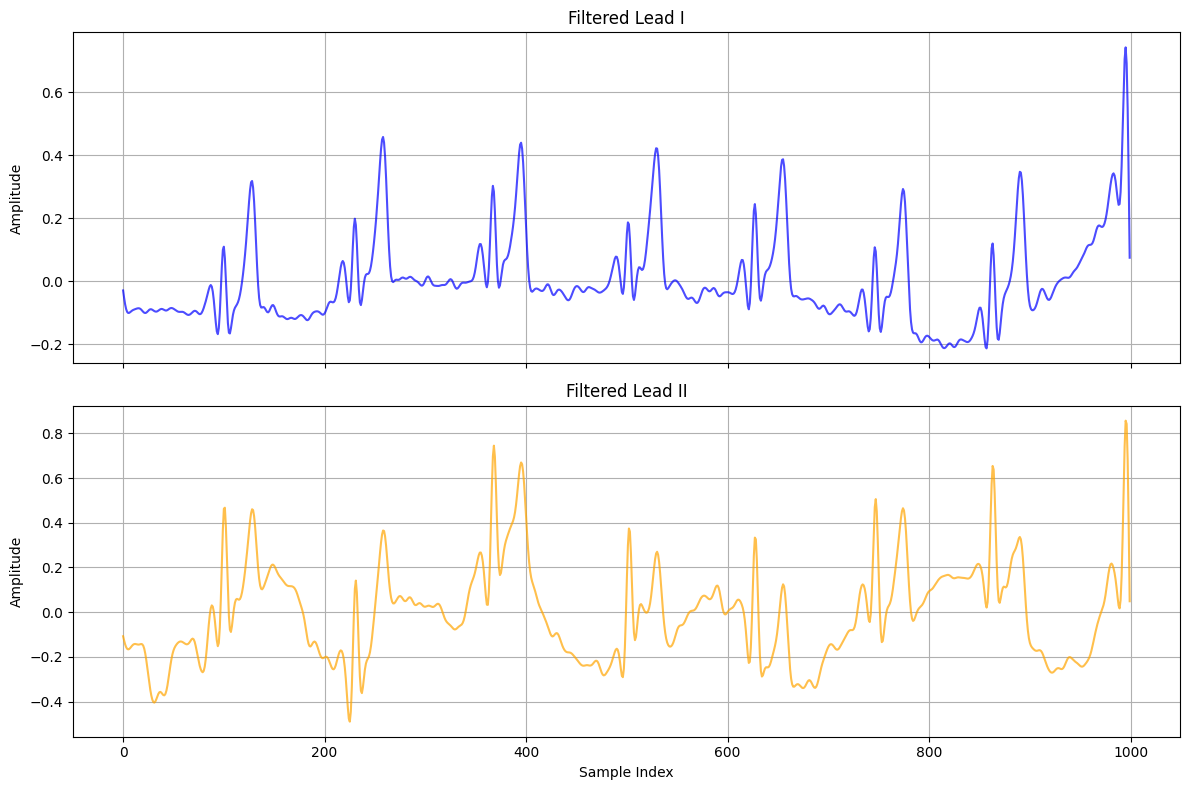

In [3]:
import matplotlib.pyplot as plt

# Create subplots for each filtered signal
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot Filtered Lead I
axes[0].plot(filtered_lead_I, color="blue", alpha=0.7)
axes[0].set_title("Filtered Lead I")
axes[0].set_ylabel("Amplitude")
axes[0].grid(True)

# Plot Filtered Lead II
axes[1].plot(filtered_lead_II, color="orange", alpha=0.7)
axes[1].set_title("Filtered Lead II")
axes[1].set_xlabel("Sample Index")
axes[1].set_ylabel("Amplitude")
axes[1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()